# Breast Cancer Wisconsin (Diagnostic) 

Dataset link : https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Attribute Information:

1) ID number

2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

**Import the main Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [2]:
## Read the CSV file using pandas
df = pd.read_csv('data.csv')

In [3]:

## Show the Head of the DF
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
# feature names as a list
col = pd.DataFrame(df.columns)     
print(col)

                          0
0                        id
1                 diagnosis
2               radius_mean
3              texture_mean
4            perimeter_mean
5                 area_mean
6           smoothness_mean
7          compactness_mean
8            concavity_mean
9       concave points_mean
10            symmetry_mean
11   fractal_dimension_mean
12                radius_se
13               texture_se
14             perimeter_se
15                  area_se
16            smoothness_se
17           compactness_se
18             concavity_se
19        concave points_se
20              symmetry_se
21     fractal_dimension_se
22             radius_worst
23            texture_worst
24          perimeter_worst
25               area_worst
26         smoothness_worst
27        compactness_worst
28          concavity_worst
29     concave points_worst
30           symmetry_worst
31  fractal_dimension_worst
32              Unnamed: 32


In [6]:
## Check some info about the Dataset to (see nulls and DataTypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
## Check the nulls
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
## Show some statistics about the Dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [9]:
## Split the whole Dataset to Feature & Target
df = df.replace({'B':0,'M':1})
list = ['Unnamed: 32','id','diagnosis']
X = df.drop(list,axis = 1)

y = df.diagnosis                         

In [10]:
# Show the Head of the Feature
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **Exploratory Data Analysis**

In [11]:
y.unique()

array([1, 0], dtype=int64)

categories of (diagnosis) --- 
 0    357
1    212
Name: diagnosis, dtype: int64
********************************************************************************


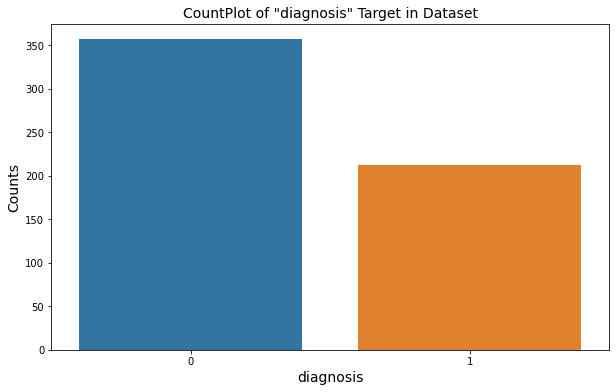

In [12]:
### Check the Distribution Target in Dataset
diagnosis_values = df['diagnosis'].value_counts()
print('categories of (diagnosis) --- \n', diagnosis_values)
print('**'*40)


## Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x=df['diagnosis'], data= df, order = diagnosis_values.index)
plt.title('CountPlot of "diagnosis" Target in Dataset', fontsize=14, c = 'k')
plt.xlabel('diagnosis', fontsize = 14, c ='k')
plt.ylabel('Counts', fontsize = 14, c ='k');

** I plot features in 3 group and each group includes 10 features**

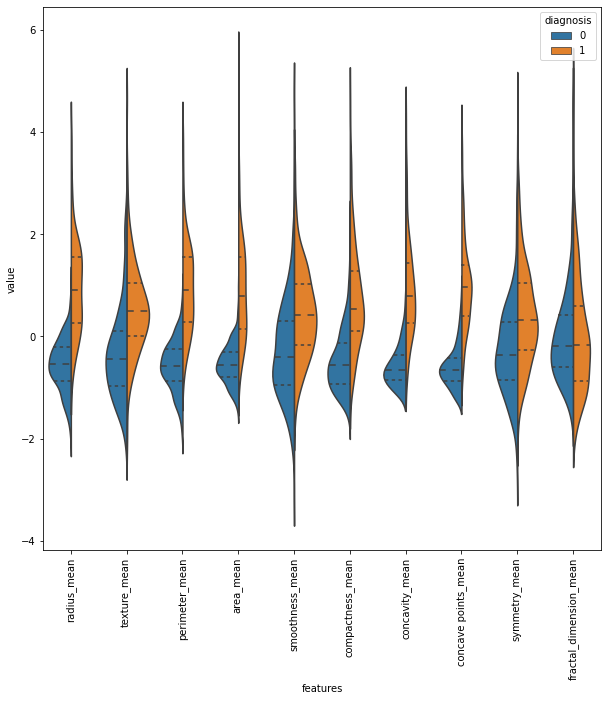

In [13]:
# first ten features
stand_data = (X - X.mean()) / (X.std())              # standardization
data = pd.concat([y,stand_data.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

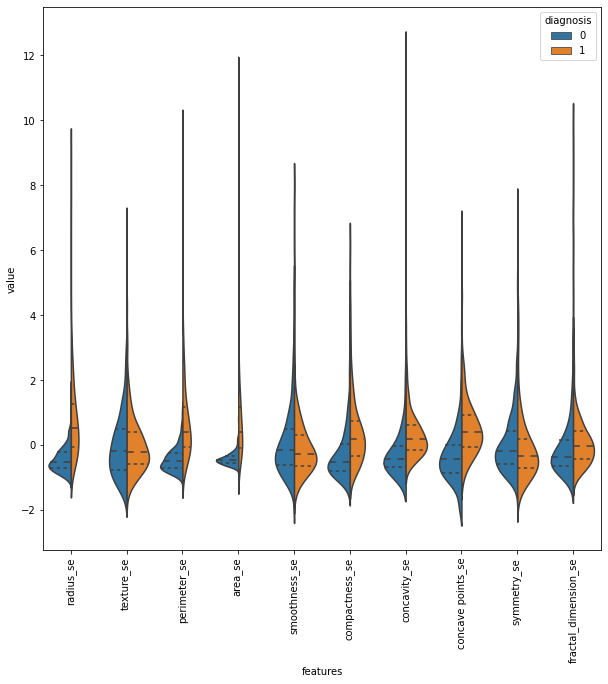

In [14]:
# Second  ten features
stand_data = (X - X.mean()) / (X.std())              # standardization
data = pd.concat([y,stand_data.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

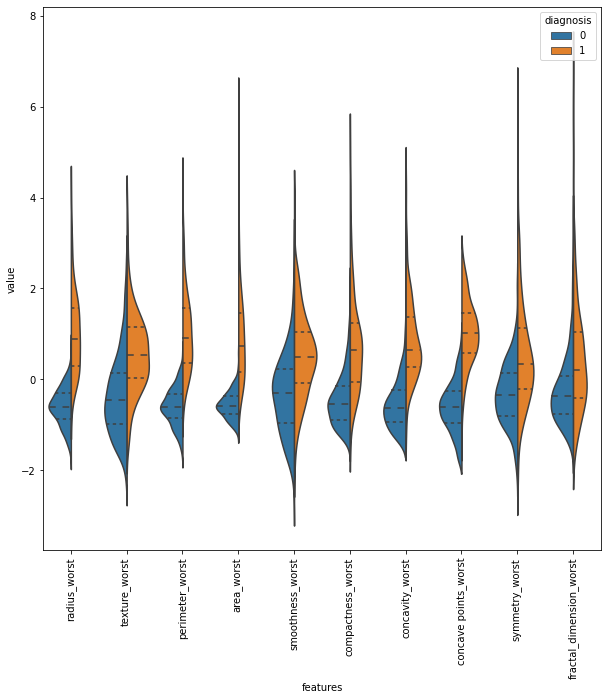

In [15]:
# Third  ten features
stand_data = (X - X.mean()) / (X.std())              # standardization
data = pd.concat([y,stand_data.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

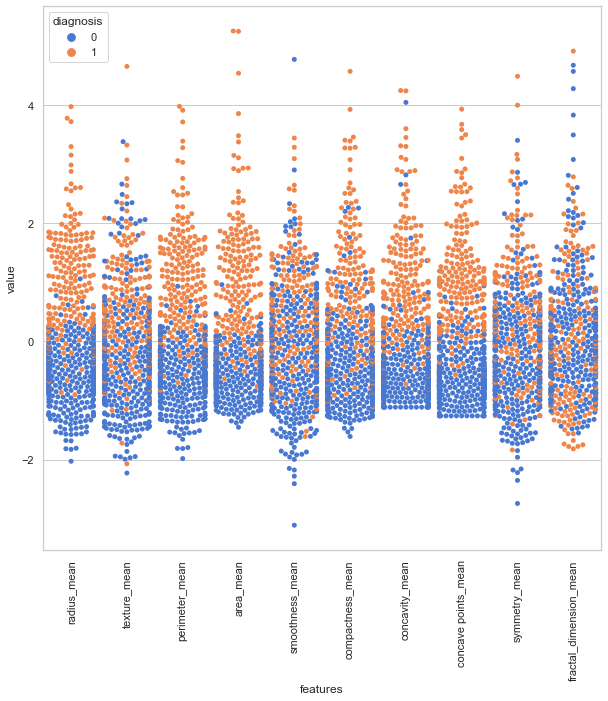

In [16]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90);

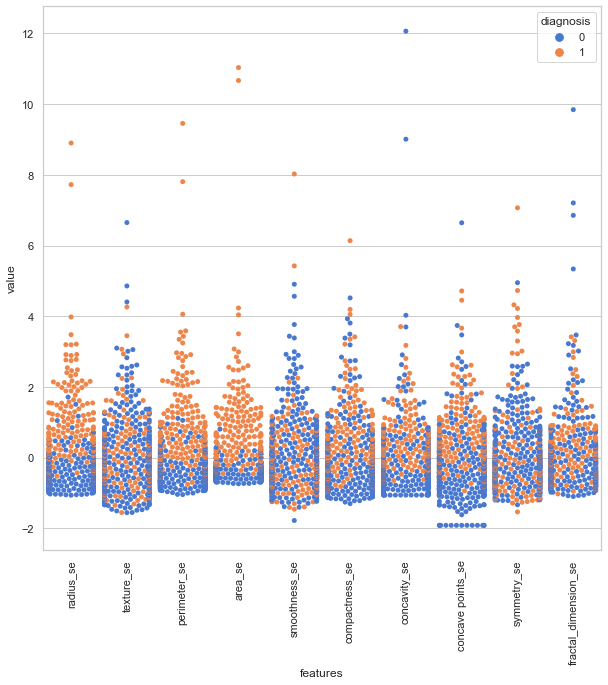

In [17]:
sns.set(style="whitegrid", palette="muted")

standa_data = (X - X.mean()) / (X.std())              # standardization
data = pd.concat([y,standa_data.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))

sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90);

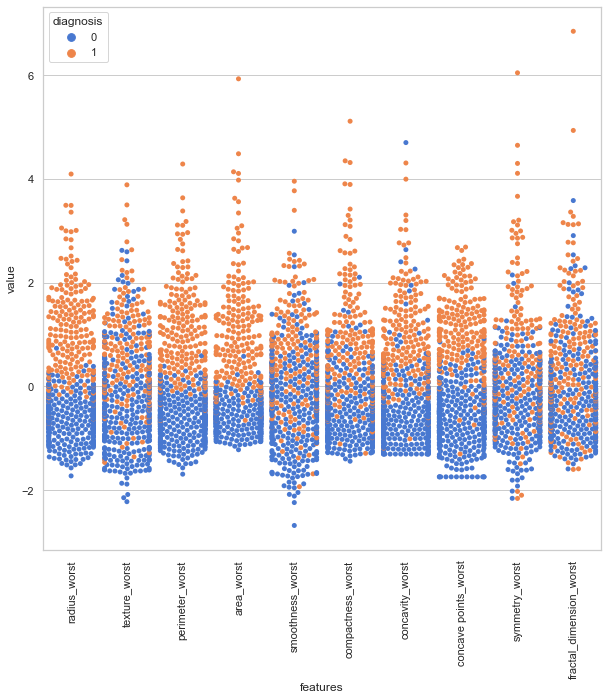

In [18]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90);

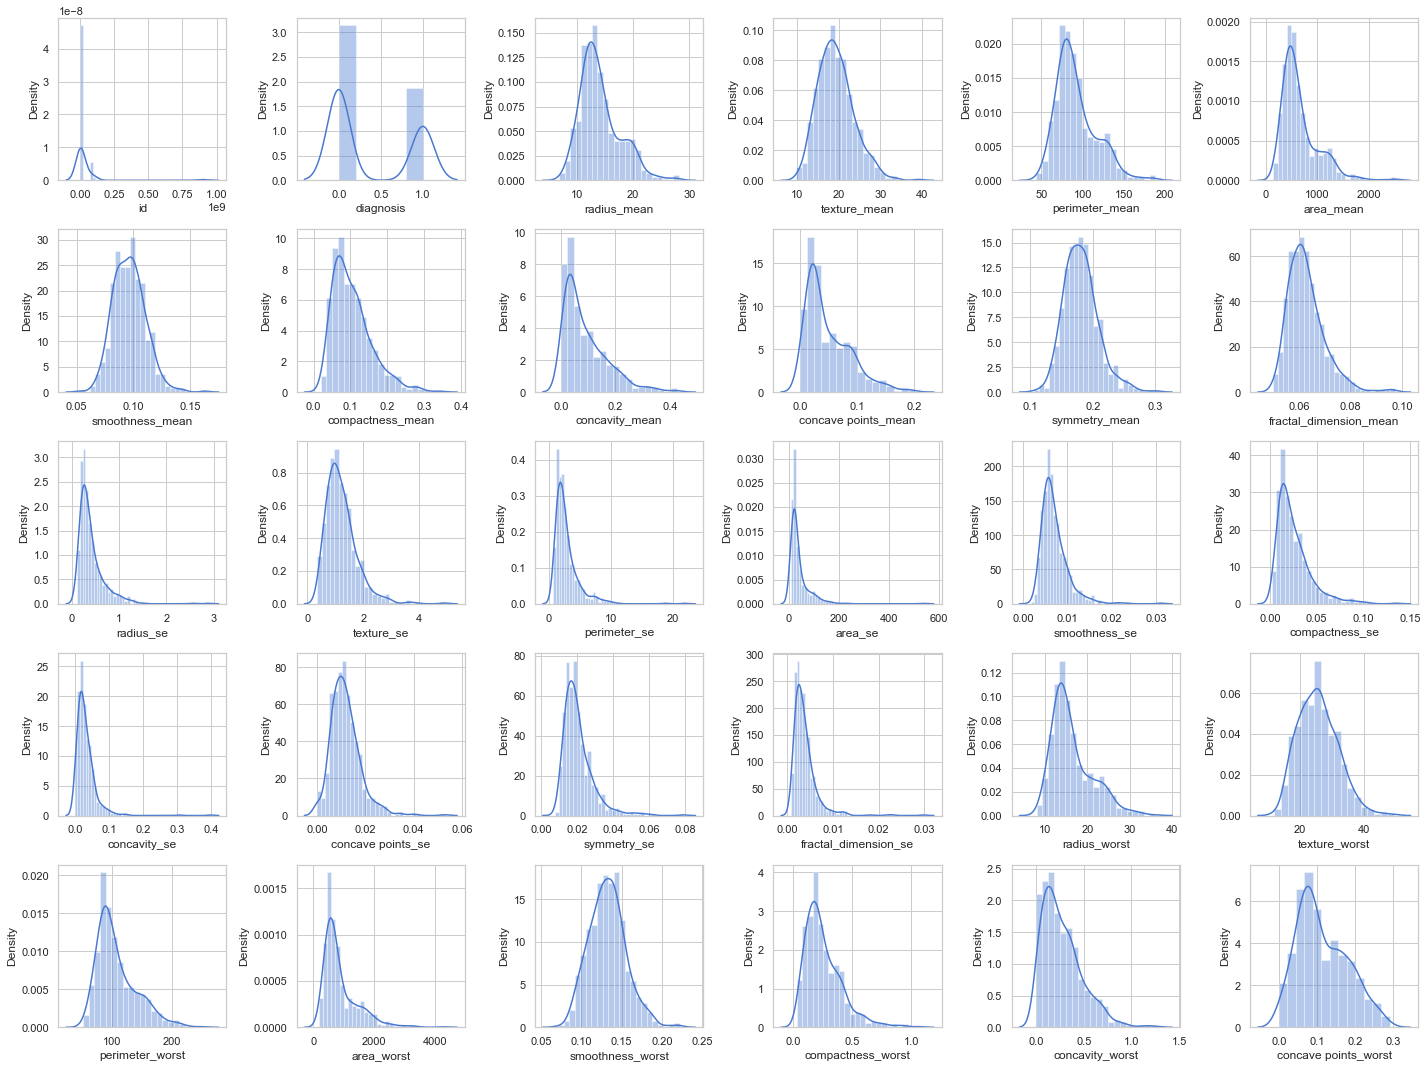

In [19]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df:
    if plotnumber <= 30:
        ax = plt.subplot(5, 6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

By the above plot we can see data distribution and also identify outliers.

# **Selecting features based on correlation**

In [20]:
corr = df.corr()
corr.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872,NaN
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN


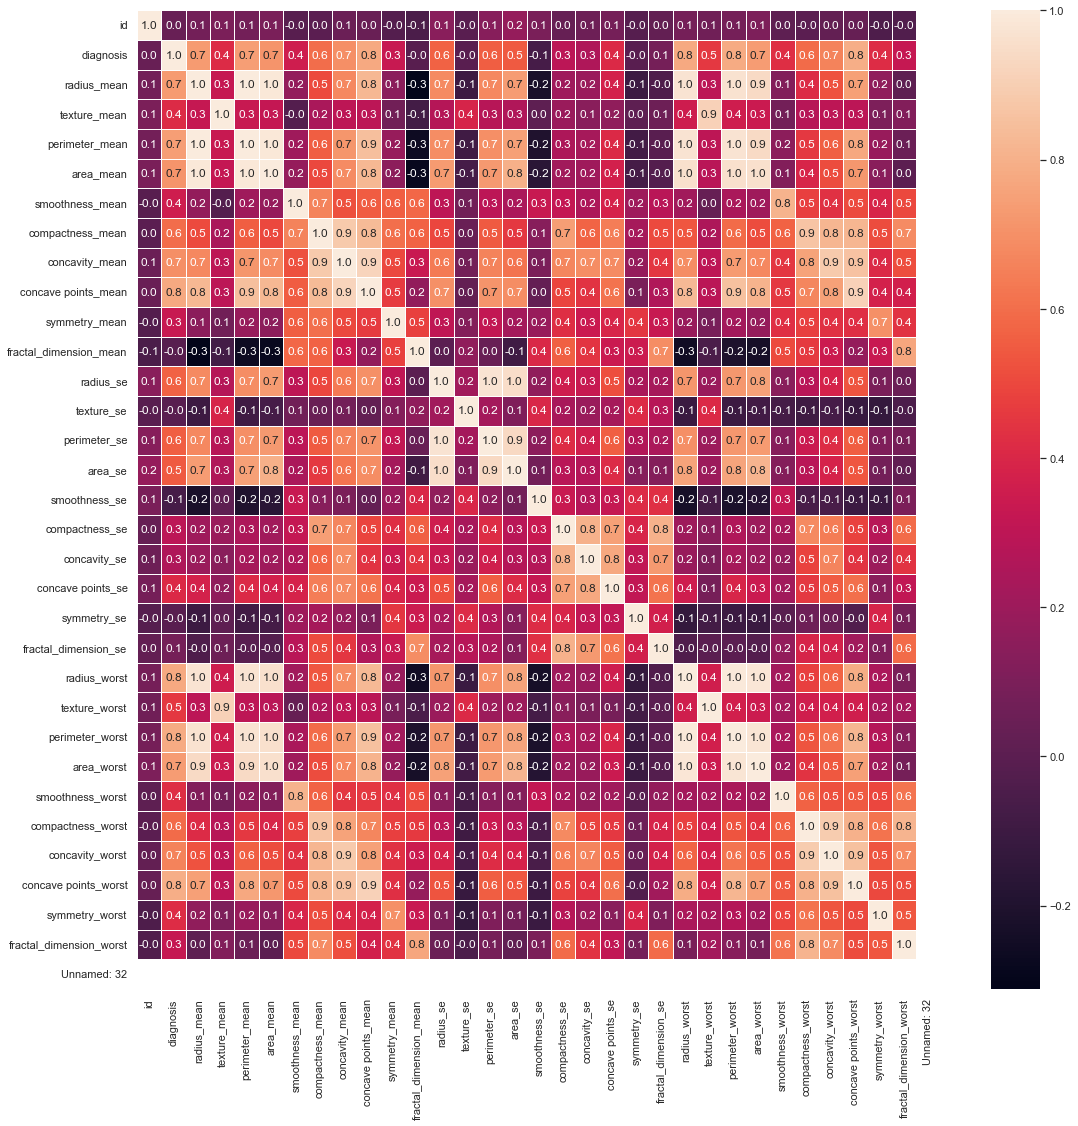

In [21]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [22]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.92:
            if columns[j]:
                columns[j] = False

In [23]:
selected_columns = df.columns[columns]
selected_columns.shape

(25,)

Above, we can see that only 23 columns were selected.

In [24]:
df = df[selected_columns]

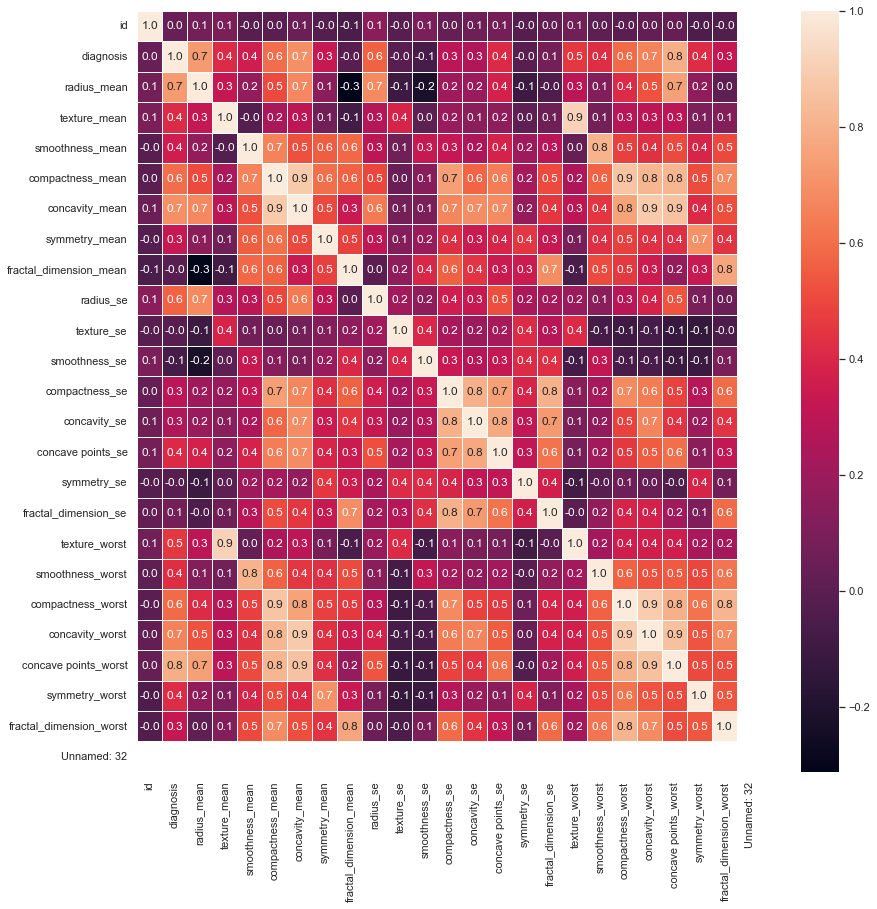

In [25]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

# **Most corrlated Features with diagnosis**

In [26]:
## check the correlation again
df.corr()['diagnosis'].sort_values(ascending=False).head(10) 

diagnosis               1.000000
concave points_worst    0.793566
radius_mean             0.730029
concavity_mean          0.696360
concavity_worst         0.659610
compactness_mean        0.596534
compactness_worst       0.590998
radius_se               0.567134
texture_worst           0.456903
smoothness_worst        0.421465
Name: diagnosis, dtype: float64

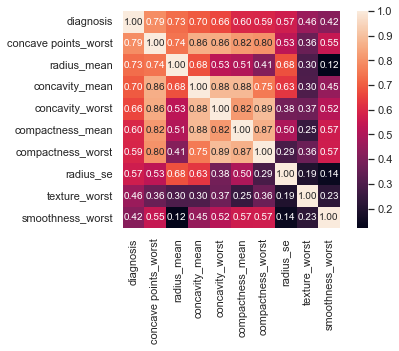

In [27]:
corrmat = df.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'diagnosis')['diagnosis'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# **dealing with Outliers**

In [28]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)

    
    
df = mod_outlier(df)

# ** splitting data into training and test set**

In [29]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = 0)

In [30]:
## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (398, 30)
y_train shape --  (398,)
X_test shape --  (171, 30)
y_test shape --  (171,)


# **Scaling Data**

In [31]:
# using StandardScaler to scal the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Logistic Regression**

In [32]:
# fitting data to model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(C = 0.1)
log_reg.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [33]:
# model predictions

log_pred = log_reg.predict(X_test)

In [34]:
# accuracy score
print(f'y_train accuracy: {accuracy_score(y_train, log_reg.predict(X_train))}')

log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(f'y_test accuracy: {log_reg_acc}')

y_train accuracy: 0.9824120603015075
y_test accuracy: 0.9707602339181286


In [35]:
# Define the cross-validation technique
cv = KFold(n_splits= 5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(log_reg, X_train, y_train, scoring='accuracy', cv=cv)

# Print the mean accuracy across all folds
print('Mean accuracy: %.3f' % (scores.mean()))

Mean accuracy: 0.972


In [36]:
cf_matrix = confusion_matrix(y_test,log_pred)
print(cf_matrix)
print('*'*50)
print(classification_report(y_test, log_pred))


[[107   1]
 [  4  59]]
**************************************************
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



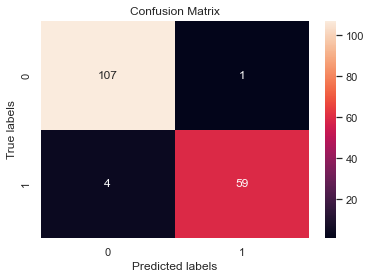

In [37]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


# **Support Vector Classifier**

In [38]:
from sklearn.svm import SVC
svc = SVC()

parameters = {
    'gamma' : [0.0001, 0.001, 0.01, 0.1],
    'C' : [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
    'gamma': ['scale', 'auto']
}

grid_svc = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': ['scale', 'auto']})

In [39]:
# model predictions

svc_pred = grid_svc .predict(X_test)

In [40]:
# Print the best hyperparameters and score
print("Best parameters: ", grid_svc.best_params_)
print("Best score: ", grid_svc.best_score_)

Best parameters:  {'C': 1, 'gamma': 'scale'}
Best score:  0.9774683544303798


In [41]:
# accuracy score
print(f'y_train accuracy: {accuracy_score(y_train, grid_svc.predict(X_train))}')

svc_acc =  accuracy_score(y_test, grid_svc.predict(X_test))
print(f'y_test accuracy: {svc_acc}')

y_train accuracy: 0.9824120603015075
y_test accuracy: 0.9766081871345029


In [42]:
# Define the cross-validation technique
cv = KFold(n_splits= 5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(grid_svc, X_train, y_train, scoring='accuracy', cv=cv)

# Print the mean accuracy across all folds
print('Mean accuracy: %.3f' % (scores.mean()))

Mean accuracy: 0.972


In [43]:
cf_matrix = confusion_matrix(y_test,svc_pred)
print(cf_matrix)
print('*'*50)
print(classification_report(y_test, svc_pred))


[[107   1]
 [  3  60]]
**************************************************
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



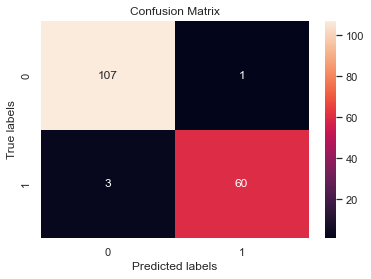

In [44]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# **Gradient Boosting Classifier**

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 5, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [46]:
gbc_pred = grid_search_gbc.predict(X_test)

In [47]:
# best parameters # Print the best hyperparameters and score
print("Best parameters: ", grid_search_gbc.best_params_)
print("Best score: ", grid_search_gbc.best_score_)

Best parameters:  {'learning_rate': 1, 'loss': 'exponential', 'n_estimators': 100}
Best score:  0.9623101265822784


In [48]:
# accuracy score
print(f'y_train accuracy: {accuracy_score(y_train, grid_search_gbc.predict(X_train))}')

gbc_acc =  accuracy_score(y_test, grid_search_gbc.predict(X_test))
print(f'y_test accuracy: {gbc_acc}')

y_train accuracy: 1.0
y_test accuracy: 0.9590643274853801


In [49]:
# Define the cross-validation technique
cv = KFold(n_splits= 5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(grid_search_gbc, X_train, y_train, scoring='accuracy', cv=cv)

# Print the mean accuracy across all folds
print('Mean accuracy: %.3f' % (scores.mean()))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mean accuracy: 0.955


In [50]:
cf_matrix = confusion_matrix(y_test,gbc_pred)
print(cf_matrix)
print('*'*50)
print(classification_report(y_test, gbc_pred))

[[105   3]
 [  4  59]]
**************************************************
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       108
           1       0.95      0.94      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



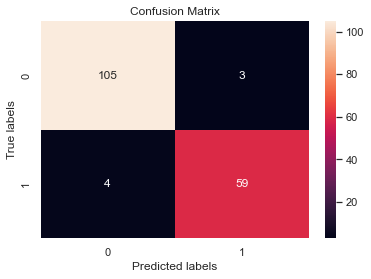

In [51]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# **Extreme Gradient Boosting**

In [52]:
from xgboost import XGBClassifier\
# Define the hyperparameters to search over
param_grid = {
    'learning_rate': [0.1,0.2 ,0.3, 0.5],
    'max_depth': [3, 5, 7,9],
    'n_estimators': [50, 100,150, 200]
}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the grid search object
grid_xgb =  GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...t=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.5],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200]})

In [53]:
xgb_pred = grid_xgb.predict(X_test)

In [54]:
# Print the best hyperparameters and score
print("Best parameters: ", grid_xgb.best_params_)
print("Best score: ", grid_xgb.best_score_)

Best parameters:  {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best score:  0.9598101265822784


In [55]:
# accuracy score
print(f'y_train accuracy: {accuracy_score(y_train, grid_xgb.predict(X_train))}')

xgb_acc =  accuracy_score(y_test, grid_xgb.predict(X_test))
print(f'y_test accuracy: {xgb_acc}')

y_train accuracy: 1.0
y_test accuracy: 0.9707602339181286


In [56]:
# Define the cross-validation technique
cv = KFold(n_splits= 5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(grid_xgb, X_train, y_train, scoring='accuracy', cv=cv)

# Print the mean accuracy across all folds
print('Mean accuracy: %.3f' % (scores.mean()))

Mean accuracy: 0.957


In [57]:
cf_matrix = confusion_matrix(y_test,xgb_pred)
print(cf_matrix)
print('*'*50)
print(classification_report(y_test, xgb_pred))

[[106   2]
 [  3  60]]
**************************************************
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



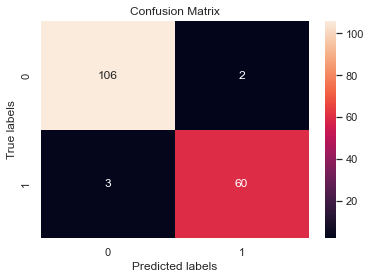

In [58]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# **LightGBM**

In [59]:
from lightgbm import LGBMClassifier

# Define the hyperparameters to search over
param_grid = {
    'learning_rate': [0.1, 0.3, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Create a LightGBM classifier
lgbm = LGBMClassifier()

# Define the grid search object
grid_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search object to the training data
grid_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

In [60]:
lgbm_pred = grid_lgbm.predict(X_test)

In [61]:
# accuracy score
print(f'y_train accuracy: {accuracy_score(y_train, grid_lgbm.predict(X_train))}')

lgbm_acc =  accuracy_score(y_test, grid_lgbm.predict(X_test))
print(f'y_test accuracy: {lgbm_acc}')

y_train accuracy: 1.0
y_test accuracy: 0.9824561403508771


In [62]:
# Define the cross-validation technique
cv = KFold(n_splits= 5, shuffle=True, random_state=42)

# Evaluate the model using cross-validation
scores = cross_val_score(grid_lgbm, X_train, y_train, scoring='accuracy', cv=cv)

# Print the mean accuracy across all folds
print('Mean accuracy: %.3f' % (scores.mean()))

Mean accuracy: 0.965


In [63]:
cf_matrix = confusion_matrix(y_test,lgbm_pred)
print(cf_matrix)
print('*'*50)
print(classification_report(y_test, lgbm_pred))

[[107   1]
 [  2  61]]
**************************************************
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



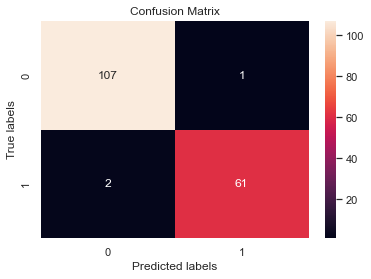

In [64]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

# **VotingClassifier**

In [65]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Logistic Regression', log_reg), ('gradient bossting', grid_search_gbc), 
               ('Support Vector Classifier', grid_svc),
               ('light gbm', grid_lgbm)]

vc = VotingClassifier(estimators = classifiers)

vc.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=0.1)),
                             ('gradient bossting',
                              GridSearchCV(cv=5,
                                           estimator=GradientBoostingClassifier(),
                                           n_jobs=-1,
                                           param_grid={'learning_rate': [0.001,
                                                                         0.1, 1,
                                                                         10],
                                                       'loss': ['deviance',
                                                                'exponential'],
                                                       'n_estimators': [100,
                                                                        150,
                                                                        180,
                                                                        200]},
                                           verbose=1)),
                             ('Support Vector Classifier',
                              GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                                           param_grid={'C': [0.01, 0.05, 0.5,
                                                             0.1, 1, 10, 15,
                                                             20],
                                                       'gamma': ['scale',
                                                                 'auto']})),
                             ('light gbm',
                              GridSearchCV(cv=5, estimator=LGBMClassifier(),
                                           n_jobs=-1,
                                           param_grid={'learning_rate': [0.1,
                                                                         0.3,
                                                                         0.5],
                                                       'max_depth': [3, 5, 7],
                                                       'n_estimators': [50, 100,
                                                                        200]}))])

In [66]:
voting_pred = vc.predict(X_test)

In [67]:
# accuracy score
print(f'y_train accuracy: {accuracy_score(y_train, vc.predict(X_train))}')

vc_acc =  accuracy_score(y_test, vc.predict(X_test))

y_train accuracy: 0.9899497487437185


In [68]:

import pickle
filename = "breast_cancer.pkl"
pickle.dump(vc, open(filename, "wb"))

In [69]:
cf_matrix = confusion_matrix(y_test,voting_pred)
print(cf_matrix)
print('*'*50)
print(classification_report(y_test, voting_pred))

[[108   0]
 [  3  60]]
**************************************************
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       1.00      0.95      0.98        63

    accuracy                           0.98       171
   macro avg       0.99      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



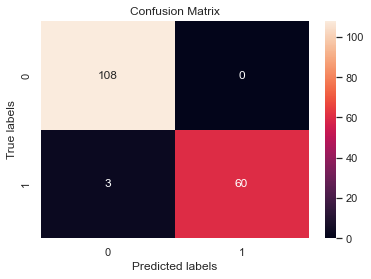

In [70]:
ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [71]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVC', 'Gradient Boosting Classifier'
              , 'Voting Classifier',
             'Gradient Boosting Classifier', 'XgBoost','Light gbm'],
    'Score': [log_reg_acc, svc_acc,gbc_acc, vc_acc, gbc_acc, xgb_acc,lgbm_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Voting Classifier,0.982456
6,Light gbm,0.982456
1,SVC,0.976608
0,Logistic Regression,0.970760
5,XgBoost,0.970760
2,Gradient Boosting Classifier,0.959064
4,Gradient Boosting Classifier,0.959064


<AxesSubplot:>

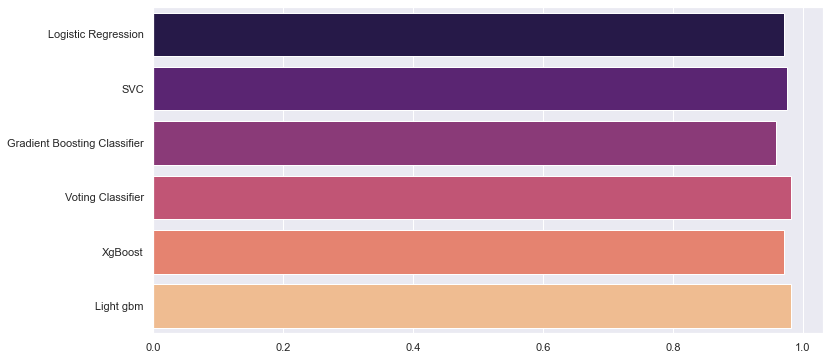

In [72]:
plt.figure(figsize=(12,6))
model_acc = [log_reg_acc, svc_acc,gbc_acc, vc_acc, gbc_acc, xgb_acc,lgbm_acc]
model_name = ['Logistic Regression', 'SVC', 'Gradient Boosting Classifier'
              , 'Voting Classifier',
             'Gradient Boosting Classifier', 'XgBoost','Light gbm']
sns.barplot(x= model_acc, y=model_name, palette='magma')